# Samruth Vennapusala
## Question 1
## January 16, 2022

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from numpy import percentile
import matplotlib.pyplot as plt
import statistics

<h1><center>------------------------Question 1------------------------</center></h1>   

_Given some sample data, write a program to answer the following: click here to access the required data set_

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis

a) __Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.__  
b) __What metric would you report for this dataset?__  
c) __What is its value?__



<center>---------------------------------------------Data Analysis---------------------------------------------</center>

In [2]:
# Import and print data


test_data_path = r"C:/Users/samru/Desktop/Data_Set.csv"
df = pd.read_csv(test_data_path)
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# Finding the AOV of the order_amount and other descriptions


df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [4]:
# Bin the data to show the order_amount distribution


bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 5000, 10000, 20000, 50000, 100000,1000000]
df['binned'] = pd.cut(df['order_amount'], bins)
graph=df['binned'].value_counts()
print(graph)


(200, 400]           2021
(0, 200]             1808
(400, 600]            872
(600, 800]            199
(800, 1000]            29
(50000, 100000]        25
(20000, 50000]         19
(100000, 1000000]      19
(1000, 1200]            5
(1400, 1600]            2
(1600, 1800]            1
(1200, 1400]            0
(1800, 2000]            0
(2000, 5000]            0
(5000, 10000]           0
(10000, 20000]          0
Name: binned, dtype: int64


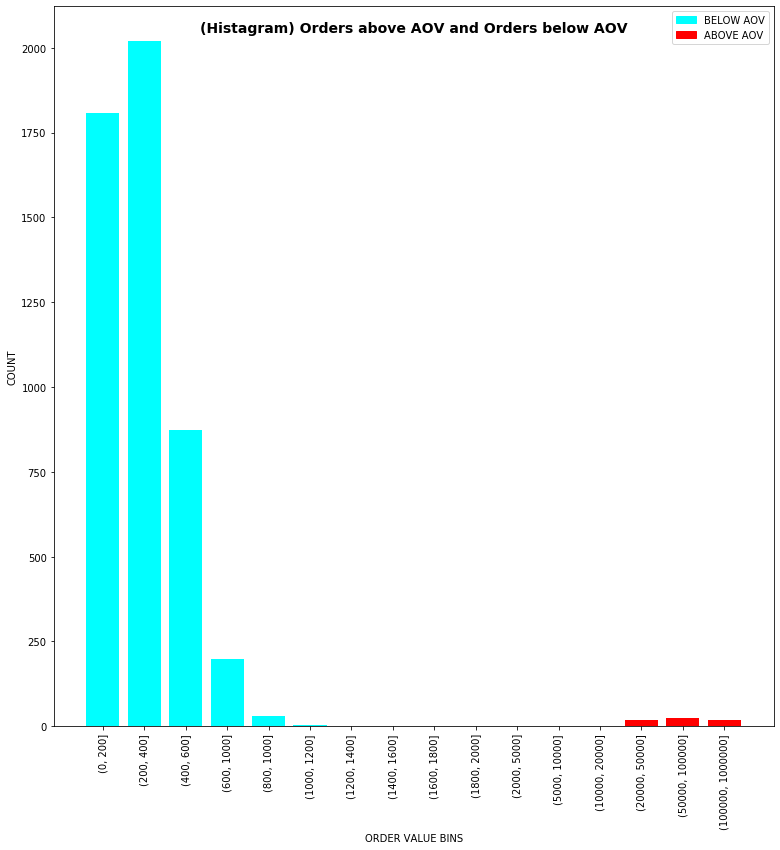

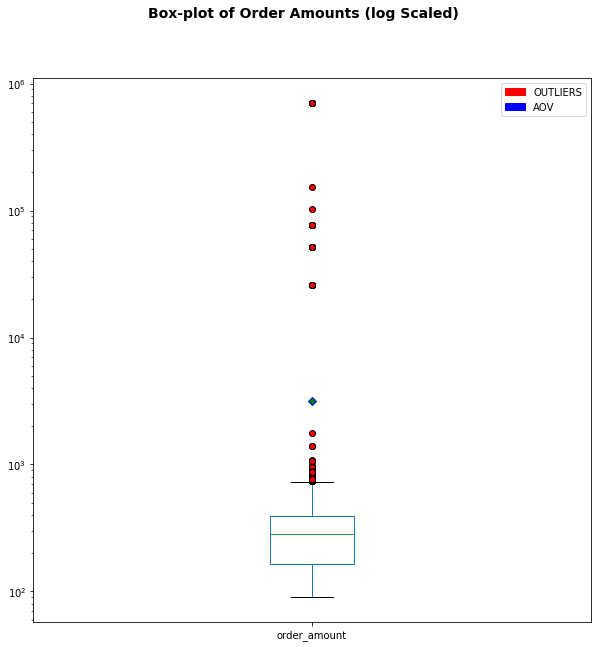

X : 
 0       224
1        90
2       144
3       156
4       156
       ... 
4995    330
4996    234
4997    351
4998    354
4999    288
Name: order_amount, Length: 5000, dtype: int64

Skewness for data :  16.670030505539835


In [23]:
# Visualizations

### Histogram Code


fig = plt.figure()
fig.suptitle('(Histagram) Orders above AOV and Orders below AOV', fontsize=14, fontweight='bold')
ax = fig.add_axes([0,0,1,1])
bins = ["(0, 200]","(200, 400]","(400, 600]","(600, 1000]","(800, 1000]","(1000, 1200]","(1200, 1400]","(1400, 1600]","(1600, 1800]","(1800, 2000]","(2000, 5000]","(5000, 10000]","(10000, 20000]","(20000, 50000]","(50000, 100000]","(100000, 1000000]"]
value = [1808, 2021,872,199, 29,5,0,2,1,0,0,0,0,19,25,19]
ax.bar(bins,value)

ax.set_ylabel('COUNT')
ax.set_xlabel('ORDER VALUE BINS')
x_pos = np.arange(len(bins))
plt.bar(x_pos, value, color=['cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','red','red','red'])

colors = {'BELOW AOV':'cyan', 'ABOVE AOV':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),2,2, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation = 90)
plt.show()
print("\n")




### Boxplot Code


fig = plt.figure()
fig.suptitle('Box-plot of Order Amounts (log Scaled)', fontsize=14, fontweight='bold')


plt.rcParams["figure.figsize"] = (10,10)
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='blue')
df['order_amount'].plot(kind='box',flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape)




colors = {'OUTLIERS':'red', 'AOV':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),2,2, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.semilogy()
plt.show()




### finding Skewness

  
from scipy.stats import skew

  
# random values based on a normal distribution
x = df['order_amount']
  
print ("X : \n", x)
  
print('\nSkewness for data : ', skew(x))

In [14]:
# discription of the order_amount data


df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

__Mean__ = $3,145.13

<center>---------------------------------------------Answers---------------------------------------------</center>

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In this case, the fundamental issue of using the average order value (mean) is that the mean is not the best method to evaluate a skewed distribution. The Histogram visualizes this skewness, and the boxplot shows that the AOV is above the max of the boxplot and with the outliers. Distributions that have a skewness value <-1 or >1 are typically classified as "skewed". We get a __skewness of 16.67__ for our order amount data. So, it is clear that the AOV is not the best metric to portray this data.

__What is a better way to evaluate this data?__

We need a metric that is the best measure of central tendency when the data is skewed.

### b) What metric would you report for this dataset?

__The _median_ is generally considered to be the best representative of the central location of the data when you are dealing with skewed data.__ The more skewed the distribution, the greater the difference between the median and mean, and the greater emphasis should be placed on using the median as opposed to the mean.

__Median__ = $284.00  
_The median value is derived from the describe cell above. 50th percentile is the median._

### c) What is its value?

The medium of this data is $284.00. This number makes a lot more sense when you answer the following question.

__How much does the typical customer spend at the sneaker shops?__

__The typical customer spends $284.00 at the Shopify sneaker shops.__

_(The mean of $3,145.13 does not represent the central tendency of purchases by the customers.)_



<h1><center>------------------------Thanks!------------------------</center></h1>   

__Hello Hiring Manager,__

__Here is the link to my winter 2021-2022 challenge submission if you want to check it out! Lots changed since then :)__

https://github.com/samruthv/Shopify_Challenge/blob/main/Shopify%20Data%20Challenge.ipynb

### Resources:  
    https://jobs.smartrecruiters.com/Shopify/743999796500238-data-science-intern-summer-2022-remote-us-canada-  
    https://matplotlib.org/     
    https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet  